#**import libraries**

In [3]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

#**import data**

In [5]:
df = pd.read_csv('penguins.csv')
print(df.shape)
print(df.head())

(344, 9)
   rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [7]:
df.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


#**visualize data**

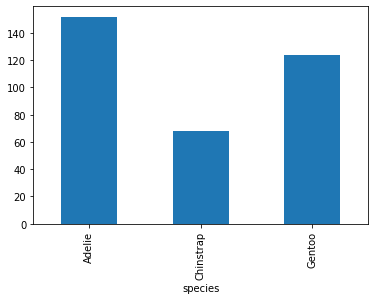

In [8]:
df2 = df.groupby([df.columns[1]]).size()
df2.plot(kind='bar')

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')


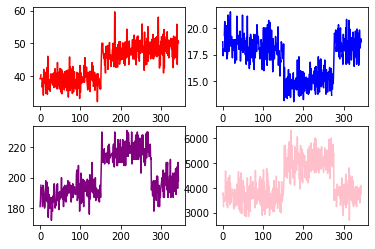

In [10]:
print(df.columns[3:7])

fig, axes = plt.subplots(nrows=2, ncols=2)

df[df.columns[3]].plot(ax=axes[0,0], color='red')
df[df.columns[4]].plot(ax=axes[0,1], color='blue')
df[df.columns[5]].plot(ax=axes[1,0], color='purple')
df[df.columns[6]].plot(ax=axes[1,1], color='pink')

plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


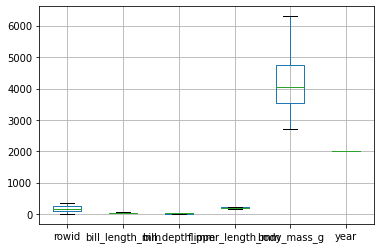

In [ ]:
df.boxplot()
plt.show(block=True)

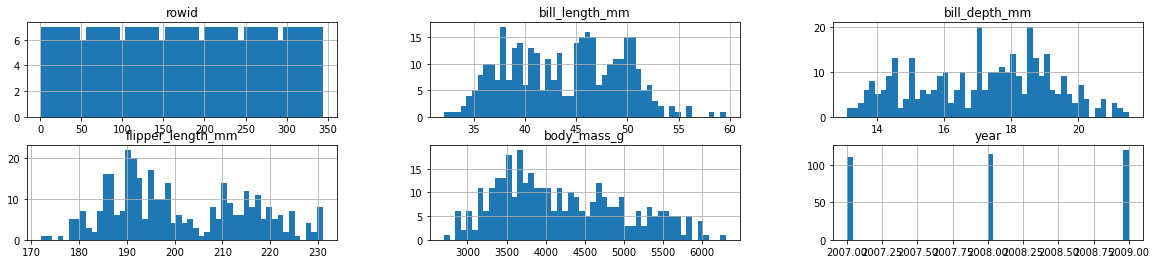

In [13]:
df.hist(bins=50, layout=(2,3), figsize=(20,4))
plt.show()

#**data cleaning**

In [14]:
df.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [15]:
print(df[df.columns[3]].describe())
print('median : ' , df[df.columns[3]].median())
print('mode : ' , df[df.columns[3]].mode())

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: bill_length_mm, dtype: float64
median :  44.45
mode :  0    41.1
dtype: float64


**numeric values**

In [16]:
print(type(df[df.columns[5]].mean()))
df[df.columns[3]].fillna(value=round(df[df.columns[3]].mean(), 1), inplace=True)
df[df.columns[4]].fillna(value=round(df[df.columns[4]].mean(), 1), inplace=True)
df[df.columns[5]].fillna(value=round(df[df.columns[5]].mean()), inplace=True)
df[df.columns[6]].fillna(value=round(df[df.columns[6]].mean()), inplace=True)
df.head()

<class 'numpy.float64'>


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,43.9,17.2,201.0,4202.0,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


**nominal values**

In [17]:
print(df[df.columns[7]].describe())
df[df.columns[7]].fillna(df[df.columns[7]].mode()[0], inplace=True)
df.head()

count      333
unique       2
top       male
freq       168
Name: sex, dtype: object


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,43.9,17.2,201.0,4202.0,male,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


#**split datas to train and test**

In [18]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, 3:7]
y = df.iloc[:, 1] # labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=45)
print(x_train.shape)
print(x_test.shape)

(292, 4)
(52, 4)


#**train model (decision tree)**

In [19]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [20]:
from sklearn.metrics import *

print(classification_report(y_test, y_pred)) # summery
accuracy = accuracy_score(y_pred, y_test) * 100
print(accuracy)

              precision    recall  f1-score   support

      Adelie       1.00      0.85      0.92        20
   Chinstrap       0.75      1.00      0.86         9
      Gentoo       0.96      0.96      0.96        23

    accuracy                           0.92        52
   macro avg       0.90      0.94      0.91        52
weighted avg       0.94      0.92      0.92        52

92.3076923076923


#**train model (support vector machine)**

In [21]:
from sklearn.svm import SVC

model2 = SVC()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

In [22]:
print(classification_report(y_test, y_pred)) # summery
accuracy = accuracy_score(y_pred, y_test) * 100
print(accuracy)

              precision    recall  f1-score   support

      Adelie       0.62      0.80      0.70        20
   Chinstrap       0.00      0.00      0.00         9
      Gentoo       0.81      0.91      0.86        23

    accuracy                           0.71        52
   macro avg       0.47      0.57      0.52        52
weighted avg       0.59      0.71      0.65        52

71.15384615384616


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
